In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
985,male,group A,high school,standard,none,57,51,54
620,female,group C,high school,free/reduced,none,35,61,54
979,female,group C,associate's degree,standard,none,91,95,94
325,female,group C,some college,standard,none,82,90,94
364,male,group C,some college,standard,none,59,60,58


In [4]:
df.shape

(1000, 8)

**Missing value**

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [11]:
print("gender : ",df['gender'].unique())
print("race_ethnicity : ",df['race_ethnicity'].unique())
print("parental_level_of_education : ",df['parental_level_of_education'].unique())
print("lunch : ",df['lunch'].unique())
print("test_preparation_course : ",df['test_preparation_course'].unique())

gender :  ['female' 'male']
race_ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch :  ['standard' 'free/reduced']
test_preparation_course :  ['none' 'completed']


In [12]:
df['gender'].dtype
#df['math_score'].dtype

dtype('O')

In [13]:
for i in df.columns:
    print(i)

gender
race_ethnicity
parental_level_of_education
lunch
test_preparation_course
math_score
reading_score
writing_score


In [14]:
categorical_col = [i for i in df.columns if df[i].dtype=='O']
numerical_col = [i for i in df.columns if df[i].dtype!='O']

print("there are {} numerical columns : {}".format(len(numerical_col),numerical_col))
print("there are {} numerical columns : {}".format(len(categorical_col),categorical_col))

there are 3 numerical columns : ['math_score', 'reading_score', 'writing_score']
there are 5 numerical columns : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df['Total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Avg'] = df['Total']/3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full_marks = df[df['reading_score']==100]['Avg'].count()
writing_full_marks = df[df['writing_score']==100]['Avg'].count()
math_full_marks = df[df['math_score']==100]['Avg'].count()

print("{} students get full marks in reading".format(reading_full_marks))
print("{} students get full marks in reading".format(writing_full_marks))
print("{} students get full marks in reading".format(math_full_marks))

17 students get full marks in reading
14 students get full marks in reading
7 students get full marks in reading


In [18]:
reading_less_20 = df[df['reading_score']<=20]['Avg'].count()
writing_less_20 = df[df['writing_score']<=20]['Avg'].count()
math_less_20 = df[df['math_score']<=20]['Avg'].count()

print("{} students get less than 20 marks in reading".format(reading_less_20))
print("{} students get less than 20 marks in reading".format(writing_less_20))
print("{} students get less than 20 marks in reading".format(math_less_20))

1 students get less than 20 marks in reading
3 students get less than 20 marks in reading
4 students get less than 20 marks in reading


c:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

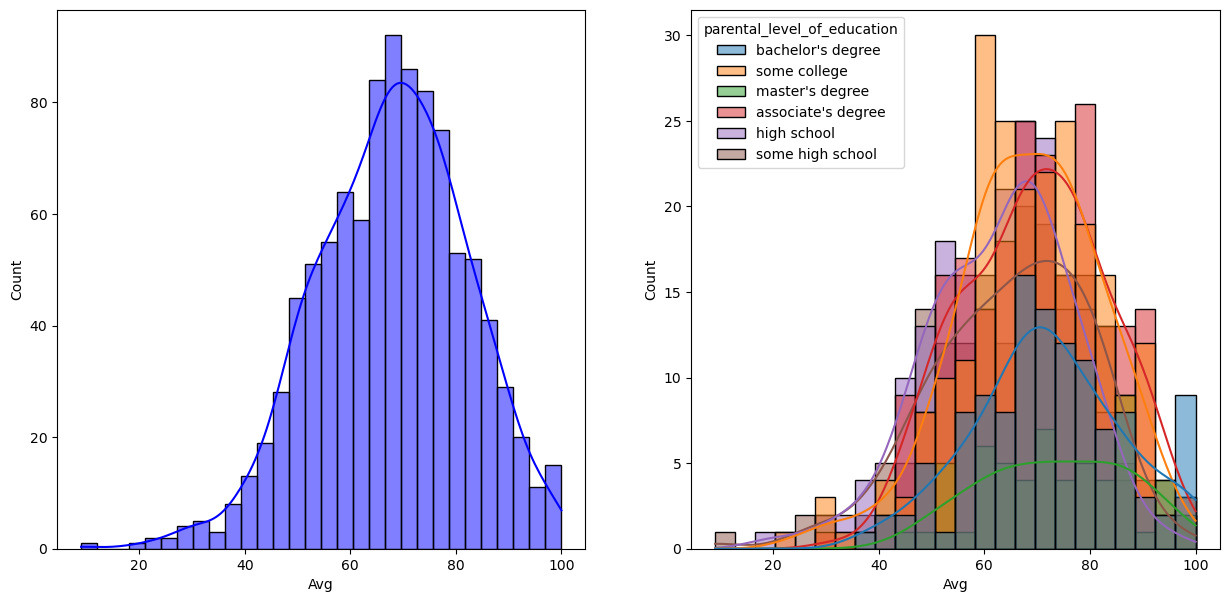

In [19]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x='Avg',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='Avg',kde=True,hue='parental_level_of_education')
plt.show()

c:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

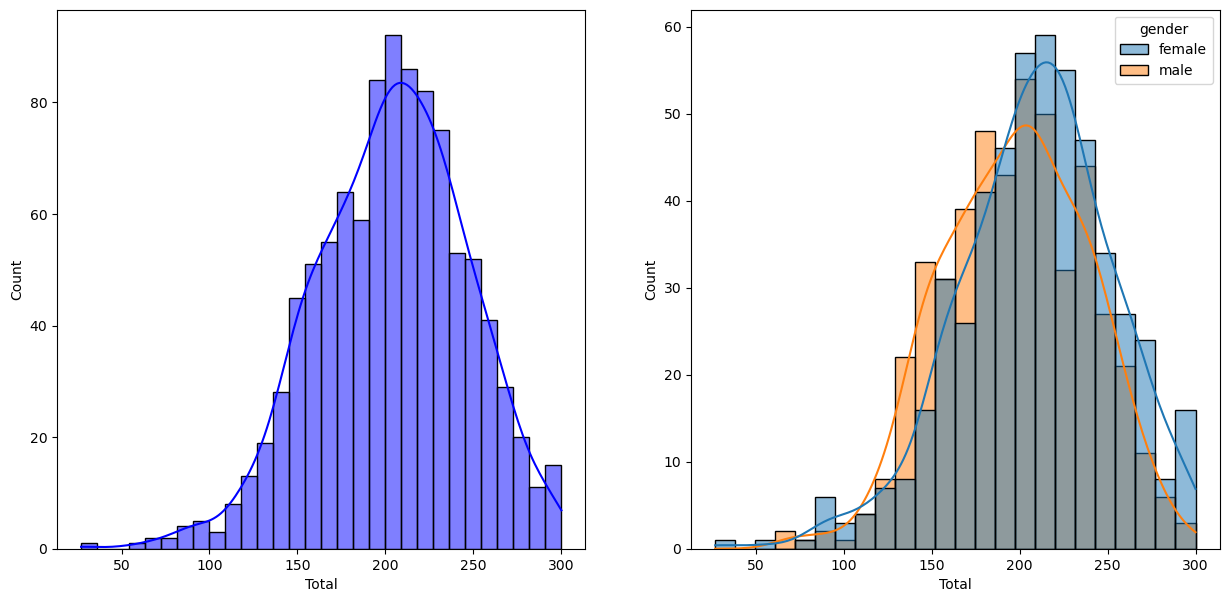

In [20]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x='Total',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='Total',kde=True,hue='gender')
plt.show()